Customer information from Ulwe Telecom is provided for data analysis. We need to learn more about customer churn rates. The performance of the business could be enhanced with the use of these insights.
As historical data, a dataset with 47 features is provided. We also receive a file with the dataset description.
The data are first subjected to exploratory data analysis.
Since the data is numerical and the normal distribution of the data is skewed, null values are replaced median. From the provided data, one can additionally deduce some attributes or create some composite attributes. Outliers are identified using a box plot with the goal variable "recharge delay." In the subsequent stage, outliers are eliminated. Features' data types are identified, and all features are converted to numerical form.
By creating additional columns containing dummy variables, some categorical traits are transformed into numerical ones. With the help of previous data and a machine learning model, customers' precise recharge delays are forecasted. Building supervised data models involves combining multivariate analysis with linear regression. All of the variables are initially used as predictors, and the model's accuracy is determined. Due to the continuous nature of the target and predictors, linear multivariate analysis is performed. In order to map the model with a mathematical formula, the beta 0 column is constructed. The R-squared test and mean squared error are used to determine accuracy because the prediction is over a continuous target.
Later in the data analysis, logistic regression is used to forecast client attrition. Accuracy, precision, and recall are computed using a confusion matrix because the target is a binary one.


In [3]:
import pandas as pd
data1=pd.read_csv('https://raw.githubusercontent.com/minal-sheth/projects/master/Minal%2BSheth.csv')

#importing data from github

In [4]:
data_df = data1

In [5]:
data1.dropna()
#reading data from github which has 46 features

,customer_id,ownership,activation_plan_code,mnp_flag,calls_incoming_cnt,calls_outgoing_cnt,calls_incoming_duration,calls_outgoing_duration,total_call_count,total_sum_duration,...,current_active_plan_validity,last_cycle_plan_mrp,last_cycle_plan_validity,avg_days_bw_rchg_and_expiry,stddev_days_bw_rchg_and_expiry,price_per_day,gb_per_day_quota,pcnt_quota_used,device_avg_asp,recharge_delay
0,10000,individual,6,0,80.0,19.0,95.945227,26.693724,99.0,122.638951,...,365,128,28,0.176600,1.331501,4.109589,3.0,1.466524,10K_to_20K,7.255093
1,10001,individual,1,0,17.0,4.0,30.198034,6.939370,21.0,37.137404,...,120,500,120,-0.261885,10.037758,4.166667,2.0,13.240316,20K_to_30K,1.774216
2,10002,individual,4,0,150.0,88.0,273.931049,167.487087,238.0,441.418137,...,700,999,180,-1.922172,3.455308,4.284286,4.0,25.152820,30K_to_50K,-10.846162
3,10003,corporate,1,0,89.0,36.0,113.618648,43.211189,125.0,156.829838,...,15,128,28,-0.928306,3.167296,6.600000,0.5,113.841035,30K_to_50K,4.601008
4,10004,individual,9,1,48.0,76.0,59.745842,76.268839,124.0,136.014680,...,90,500,120,1.265328,0.859239,3.333333,1.5,13.424269,30K_to_50K,-4.386046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10995,individual,7,0,12.0,3.0,15.805581,3.296523,15.0,19.102104,...,365,99,15,-1.333215,0.517329,4.109589,3.0,42.640848,30K_to_50K,-3.436202
996,10996,individual,9,0,10.0,2.0,15.403155,2.751630,12.0,18.154785,...,15,1500,365,2.353738,1.346329,6.600000,0.5,17.437244,10K_to_20K,8.099816
997,10997,individual,2,0,33.0,107.0,36.041158,156.652119,140.0,192.693277,...,90,999,180,4.744955,3.458185,3.333333,1.5,22.497311,30K_to_50K,7.049546
998,10998,individual,9,0,26.0,152.0,42.607193,243.780715,178.0,286.387908,...,120,300,90,0.510868,2.138013,4.166667,2.0,23.787594,less_10K,4.636170


In [6]:
data1.head()
#reading the first 5 rows

,customer_id,ownership,activation_plan_code,mnp_flag,calls_incoming_cnt,calls_outgoing_cnt,calls_incoming_duration,calls_outgoing_duration,total_call_count,total_sum_duration,...,current_active_plan_validity,last_cycle_plan_mrp,last_cycle_plan_validity,avg_days_bw_rchg_and_expiry,stddev_days_bw_rchg_and_expiry,price_per_day,gb_per_day_quota,pcnt_quota_used,device_avg_asp,recharge_delay
0,10000,individual,6,0,80.0,19.0,95.945227,26.693724,99.0,122.638951,...,365,128,28,0.176600,1.331501,4.109589,3.0,1.466524,10K_to_20K,7.255093
1,10001,individual,1,0,17.0,4.0,30.198034,6.939370,21.0,37.137404,...,120,500,120,-0.261885,10.037758,4.166667,2.0,13.240316,20K_to_30K,1.774216
2,10002,individual,4,0,150.0,88.0,273.931049,167.487087,238.0,441.418137,...,700,999,180,-1.922172,3.455308,4.284286,4.0,25.152820,30K_to_50K,-10.846162
3,10003,corporate,1,0,89.0,36.0,113.618648,43.211189,125.0,156.829838,...,15,128,28,-0.928306,3.167296,6.600000,0.5,113.841035,30K_to_50K,4.601008
4,10004,individual,9,1,48.0,76.0,59.745842,76.268839,124.0,136.014680,...,90,500,120,1.265328,0.859239,3.333333,1.5,13.424269,30K_to_50K,-4.386046


In [85]:
import numpy as np
import sympy as sy
import scipy
from scipy.stats import expon, norm
import matplotlib.pyplot as plt
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import statsmodels.api as sm
np.random.seed(1234)

Q1 a: The team becomes interested in the number of subjects that recharge acrossseveral days after their plan expires. After an exploratory data analysis whichincludes drawing the observed histogram of the data, discuss a theoretical 
distribution that could be used to model such data.



************

In [8]:
record1=data1[data1.avg_days_bw_rchg_and_expiry>0]
#knowing the amount of customers that recharge after the package is over

In [9]:
record1.describe()

,customer_id,activation_plan_code,mnp_flag,calls_incoming_cnt,calls_outgoing_cnt,calls_incoming_duration,calls_outgoing_duration,total_call_count,total_sum_duration,tot_usage_mb,...,current_active_plan_mrp,current_active_plan_validity,last_cycle_plan_mrp,last_cycle_plan_validity,avg_days_bw_rchg_and_expiry,stddev_days_bw_rchg_and_expiry,price_per_day,gb_per_day_quota,pcnt_quota_used,recharge_delay
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,...,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,10504.191532,5.540323,0.131048,57.475806,55.854839,84.598000,83.291109,113.330645,167.889110,10998.337329,...,965.516129,223.084677,949.106855,218.526210,1.904359,3.074511,4.597700,2.168347,25.475362,1.312770
std,282.608881,2.860103,0.337794,56.807485,54.105089,85.853055,83.655839,81.953791,123.442761,9545.655677,...,993.734302,232.815358,984.497517,230.136015,1.715162,3.020368,0.979001,1.164451,33.462324,7.469549
min,10000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,4.321906,313.778058,...,99.000000,15.000000,99.000000,15.000000,0.003164,0.002072,3.333333,0.500000,0.454092,-25.775418
25%,10273.250000,3.000000,0.000000,15.750000,14.750000,22.094264,22.282023,52.000000,79.453787,3865.159879,...,128.000000,28.000000,257.000000,74.500000,0.593906,0.914251,4.109589,1.000000,6.170363,-3.190191
50%,10503.500000,5.000000,0.000000,41.500000,38.000000,60.944054,56.892958,91.500000,133.670199,7916.289979,...,500.000000,120.000000,500.000000,120.000000,1.292838,2.039171,4.284286,2.000000,14.355701,1.128512
75%,10746.500000,8.000000,0.000000,81.250000,80.250000,110.811899,117.477856,154.000000,238.178132,15481.419378,...,1500.000000,365.000000,1500.000000,365.000000,2.747616,4.296782,5.550000,3.000000,28.292175,6.230675
max,10999.000000,10.000000,1.000000,361.000000,304.000000,715.476090,507.563501,431.000000,765.980071,68202.655635,...,2999.000000,700.000000,2999.000000,700.000000,8.499451,14.879131,6.600000,4.000000,252.049842,29.550684


In [10]:
d = record1.avg_days_bw_rchg_and_expiry

In [11]:
d.head()

0    0.176600
4    1.265328
5    0.564035
7    4.029222
9    1.037279
Name: avg_days_bw_rchg_and_expiry, dtype: float64

Text(0, 0.5, 'Frequency')

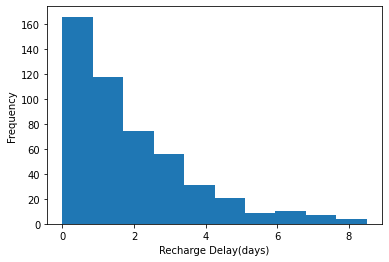

In [12]:
plt.hist(d)
plt.xlabel('Recharge Delay(days)');plt.ylabel('Frequency')
# we are plotting the count of people and the amount of days after which they have done the recharge

We fit exponential model to the data . The ML is 1/x


In [13]:
import scipy.stats as st
no_of_sub_recharge_aft_expr_mean = d.mean()
lambda_value = 1./no_of_sub_recharge_aft_expr_mean
print(lambda_value)

0.525111041362903


In [14]:
dist =st.expon
args=st.expon.fit(d)

print(args[0]/args[1])

0.0016643124854209697


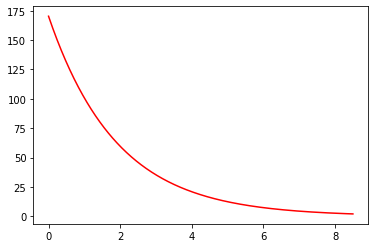

In [15]:
maxd = d.max()
days=np.linspace(0. , maxd , 500)
dist_exp=st.expon.pdf(days, scale = 1./lambda_value)
nbins=13
plt.plot(days, dist_exp*len(d)*maxd / nbins  ,'-r')

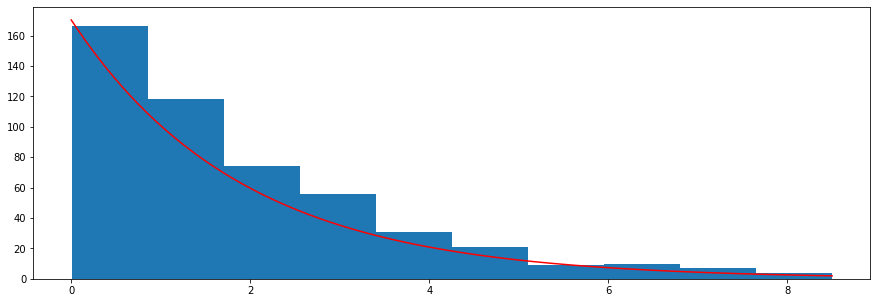

In [16]:
fig,ax=plt.subplots(1,1,figsize=(15,5))
ax.hist(d)
ax.plot(days,dist_exp*len(d)*maxd/nbins,'-r')

From the graph we can say that the graph is exponential distribution. 


In [17]:
import numpy as np
import scipy.stats as st
alph = 0.05;
mu = 0; sigma = 1; # Standard Gaussian
epsilon = st.norm.ppf(1-alph/2, mu, sigma)
print(epsilon)

1.959963984540054


In [18]:
import numpy as np
print(np.percentile(record1["avg_days_bw_rchg_and_expiry"],[25]))

[0.59390554]


1b) Find the point estimate(s) and 95\% confidence interval(s) for the values of theparameter(s) that provide(s) the best fit to the observed data.

In [19]:
alpha= 0.05
z_left = norm.ppf(alpha/2)
z_right = norm.ppf(1 - alpha/2)
n = d. shape[0]
d_mean = d.mean()
s = d.std(ddof=1)/ n ** 0.5
interval_left = d_mean + z_left * s 
interval_right = d_mean + z_right * s
print("interval_left", interval_left)
print("interval_right", interval_right)

interval_left 1.7534162912065672
interval_right 2.055301946385784


Confidence level in between {Lower_limit = 1.8834519102990044} to {Upper_limit = 2.235695361943785}"

In [58]:
from scipy.stats import t
t_left = t.interval(0.95,n-1)[0]
t_right = t.interval(0.95,n-1)[1]
interval_t_left = d_mean + t_left * s 
interval_t_right = d_mean + t_right * s
print("interval_left", interval_t_left)
print("interval_right", interval_t_right)
print("Confidence level of the Recharge delay customers :",(interval_left), (interval_right))

interval_left 1.7530463198830049
interval_right 2.055671917709346
Confidence level of the Recharge delay customers : 1.7534162912065672 2.055301946385784


(array([  2.,   6.,  20.,  30., 138., 354., 280., 123.,  33.,  14.]),
 array([-12.19756665, -10.12786485,  -8.05816306,  -5.98846126,
         -3.91875946,  -1.84905766,   0.22064413,   2.29034593,
          4.36004773,   6.42974952,   8.49945132]),
 <a list of 10 Patch objects>)

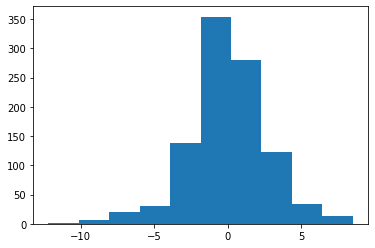

In [21]:
maxd = data1.avg_days_bw_rchg_and_expiry.max()
days1=np.linspace(0. , maxd , 500)
plt.hist(data1.avg_days_bw_rchg_and_expiry)

Q1 c: It is customary in the industry to consider the
top x percentile
of the customerswith delayed recharges as churners (i.e., the customers with the greatest delay -
after sorting by decreasing recharge delay). Different companies may considerdifferent values of x as they feel appropriate, based on the observed data andrelated inference. Therefore, typically, the value of x is chosen to be between 10 and40. Based on the data provided to you by Ghansoli Raja, suggest a value x that thecompany should use to define the churners. In other words, after how many dayssince the plan expiration would you suggest that a customer is leaving thecompany?


In [22]:
data1.sort_values('recharge_delay',ascending = False)

,customer_id,ownership,activation_plan_code,mnp_flag,calls_incoming_cnt,calls_outgoing_cnt,calls_incoming_duration,calls_outgoing_duration,total_call_count,total_sum_duration,...,current_active_plan_validity,last_cycle_plan_mrp,last_cycle_plan_validity,avg_days_bw_rchg_and_expiry,stddev_days_bw_rchg_and_expiry,price_per_day,gb_per_day_quota,pcnt_quota_used,device_avg_asp,recharge_delay
340,10340,corporate,2,0,42.0,103.0,44.847924,156.808298,145.0,201.656221,...,90,999,180,1.120970,4.150743,3.333333,1.5,8.906420,50K_above,29.550684
820,10820,individual,2,0,3.0,160.0,3.254047,165.515817,163.0,168.769864,...,180,2999,700,2.745990,3.098960,5.550000,3.0,1.730166,20K_to_30K,20.820238
401,10401,corporate,2,0,133.0,128.0,244.003278,217.769418,261.0,461.772697,...,120,500,120,0.155789,2.658143,4.166667,2.0,20.488207,less_10K,19.922149
864,10864,individual,9,1,6.0,39.0,9.426406,71.216561,45.0,80.642966,...,365,99,15,4.316351,7.221566,4.109589,3.0,1.367165,10K_to_20K,19.789137
366,10366,individual,9,0,52.0,119.0,55.646517,149.851889,171.0,205.498406,...,28,500,120,-0.164656,2.457917,4.571429,1.0,25.397636,30K_to_50K,19.609103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,10702,individual,5,1,189.0,19.0,196.720564,25.895688,208.0,222.616252,...,15,500,120,-3.057270,0.575094,6.600000,0.5,112.833242,50K_above,-22.479431
507,10507,individual,6,0,147.0,1.0,253.701518,1.989220,148.0,255.690738,...,90,99,15,0.653466,0.560603,3.333333,1.5,148.009235,50K_above,-25.017030
260,10260,individual,3,0,108.0,62.0,170.225437,105.609594,170.0,275.835030,...,120,99,15,-1.178604,3.955751,4.166667,2.0,116.564672,less_10K,-25.448472
959,10959,individual,2,0,47.0,1.0,92.678671,1.125457,48.0,93.804128,...,15,99,15,0.420076,1.001283,6.600000,0.5,226.664852,10K_to_20K,-25.775418


In [23]:
import scipy.stats as stats
data1['perecentile_recharge_delay']=[stats.percentileofscore(data1["avg_days_bw_rchg_and_expiry"].values,i) for i in data1['avg_days_bw_rchg_and_expiry'].values ]
data1['perecentile_recharge_delay']

0      53.9
1      44.6
2      18.4
3      30.9
4      74.8
       ... 
995    24.6
996    84.2
997    96.2
998    61.0
999    61.6
Name: perecentile_recharge_delay, Length: 1000, dtype: float64

In [24]:
new_data1 = data1[['perecentile_recharge_delay','avg_days_bw_rchg_and_expiry']].sort_values('avg_days_bw_rchg_and_expiry',ascending = False)
new_data1.head(100)

,perecentile_recharge_delay,avg_days_bw_rchg_and_expiry
608,100.0,8.499451
412,99.9,8.176130
171,99.8,7.927657
889,99.7,7.709917
852,99.6,7.589958
...,...,...
189,90.5,3.191037
66,90.4,3.167711
537,90.3,3.164718
978,90.2,3.151526


In [25]:
df_data1=new_data1[new_data1['perecentile_recharge_delay']>90.0]
avg_days=df_data1['avg_days_bw_rchg_and_expiry'].mean()
avg_days

4.686831739084899

Here i have taken the value of recharge delay as 10.

2 -  Vashi Kumari is interested in testing some specific hypotheses on the customers'behavior. Based on the data provided to you, would you reject or fail to reject thefollowing hypotheses?

a) Customers who are not ready to forego their phone numbers (mnp_flag=1)recharge earlier than the rest

Null hypothesis H0 = Customers who are not ready to forego their phone numbers (mnp_flag=1) recharge earlier than the rest.

Alternate hypothesis H1 = Customers who are ready to forego their phone numbers (mnp_flag=0)recharge earlier than the rest.

In [26]:
flag1 = data1[data1["mnp_flag"] == 1]
mnpflag_1 = flag1["avg_days_bw_rchg_and_expiry"]

flag0 = data1[data1["mnp_flag"] == 0]
mnpflag_0 = flag0["avg_days_bw_rchg_and_expiry"]

from scipy.stats import ttest_ind
ttest,pval = ttest_ind(mnpflag_1,mnpflag_0, alternative = 'greater')
print("p-value",pval)
if pval <0.05:
  print("We reject null hypothesis")
else:
  print("We fail to reject null hypothesis")

p-value 0.4425904117815644
We fail to reject null hypothesis


We used T-test and found that the customers who do not want to forego their phone numbers recharge earlier than others is derived by failing to get null hypothesis.

2 b: Committed customers (customers with current plan validity more than last cycleplan validity) recharge earlier than the rest
Null hypothesis H0 = Committed customers which means customers with current plan validity more than last cycle plan validity 
recharge earlier than the rest.

Alternate hypothesis H1 = Customers with current plan validity less than last cycle plan validity recharge earlier than 
the rest.

In [27]:
validity_data1_0 = data1[data1["current_active_plan_validity"]> data1["last_cycle_plan_validity"]]
validity_of_h0 = validity_data1_0["avg_days_bw_rchg_and_expiry"]

validity_data1_1 = data1[data1["current_active_plan_validity"]< data1["last_cycle_plan_validity"]]
validity_of_h1 = validity_data1_1["avg_days_bw_rchg_and_expiry"]

from scipy.stats import ttest_ind
ttest,pval = ttest_ind(validity_of_h1,validity_of_h0, alternative = 'greater')
print("p-value",pval)
if pval <0.05:
  print("We reject null hypothesis")
else:
  print("We fail to reject null hypothesis")

p-value 0.08915456038238265
We fail to reject null hypothesis


2 c: Customers who are not ready to forego their phone numbers (mnp_flag=1) showbetter engagement (tot_usage_mb and total_sum_duration)



In [28]:
mnp_tot_usage_mb0= flag0['tot_usage_mb']
mnp_tot_usage_mb1=flag1['tot_usage_mb']
statistic, probability_value = stats.ttest_ind(mnp_tot_usage_mb0, mnp_tot_usage_mb1)
print("p value",probability_value)
if probability_value <0.05:
  print("Null hypothesis rejected, alternate hypothesis accepted")
else:
  print("Null hypothesis failed to be rejected, alternate hypothesis rejected")

p value 0.35507111293280047
Null hypothesis failed to be rejected, alternate hypothesis rejected


In [29]:
mnp_total_sum_duration0=flag0['total_sum_duration']
mnp_total_sum_duration1=flag1['total_sum_duration']
statistic, probability_value = stats.ttest_ind(mnp_total_sum_duration0, mnp_total_sum_duration1)
print("p value",probability_value)
if probability_value <0.05:
  print("Null hypothesis rejected, alternate hypothesis accepted")
else:
  print("Null hypothesis failed to be rejected, alternate hypothesis rejected")

p value 0.6605209994019128
Null hypothesis failed to be rejected, alternate hypothesis rejected


2 d: Promotional schemes at the time of activation (activation_offer_code) areassociated with the engagement (tot_usage_mb and total_sum_duration) of thecustomers and thus their timely recharge or recharge delay

In [61]:
activation_plan_code_1 = data1[(data1['activation_plan_code'] == 1)]
activation_plan_code_2 = data1[(data1['activation_plan_code'] == 2)]
activation_plan_code_3 = data1[(data1['activation_plan_code'] == 3)]
activation_plan_code_4 = data1[(data1['activation_plan_code'] == 4)]
activation_plan_code_5 = data1[(data1['activation_plan_code'] == 5)]
activation_plan_code_6 = data1[(data1['activation_plan_code'] == 6)]
activation_plan_code_7 = data1[(data1['activation_plan_code'] == 7)]
activation_plan_code_8 = data1[(data1['activation_plan_code'] == 8)]
activation_plan_code_9 = data1[(data1['activation_plan_code'] == 9)]
activation_plan_code_10 = data1[(data1['activation_plan_code'] == 10)]

In [64]:
f_oneway(activation_plan_code_1['tot_usage_mb'], activation_plan_code_2['tot_usage_mb'], activation_plan_code_3['tot_usage_mb'],
         activation_plan_code_4['tot_usage_mb'], activation_plan_code_5['tot_usage_mb'], activation_plan_code_6['tot_usage_mb'],
         activation_plan_code_7['tot_usage_mb'], activation_plan_code_8['tot_usage_mb'], activation_plan_code_9['tot_usage_mb'],
         activation_plan_code_10['tot_usage_mb'])

F_onewayResult(statistic=0.4996121521802118, pvalue=0.8753710777874031)

In [65]:
pval = 0.8753710777874031

if pval <0.05:
  print("We reject null hypothesis")
else:
  print("We fail to reject null hypothesis")

We fail to reject null hypothesis


In [66]:
f_oneway(activation_plan_code_1['total_sum_duration'], activation_plan_code_2['total_sum_duration'], 
         activation_plan_code_3['total_sum_duration'], activation_plan_code_4['total_sum_duration'], 
         activation_plan_code_5['total_sum_duration'], activation_plan_code_6['total_sum_duration'], 
         activation_plan_code_7['total_sum_duration'], activation_plan_code_8['total_sum_duration'],
         activation_plan_code_9['total_sum_duration'], activation_plan_code_10['total_sum_duration'])


F_onewayResult(statistic=0.7055170879217786, pvalue=0.7042654047366004)

In [67]:
pval = 0.7042654047366004

if pval <0.05:
  print("We reject null hypothesis")
else:
  print("We fail to reject null hypothesis")

We fail to reject null hypothesis


2 e: Customers with better experience (implicit - pcnt_dropped_calls or explicit -cnt_open_qrc) recharge earlier than the rest

Null hypothesis = Customers with better experience (in terms of percentage call drops) recharge earlier than the rest.

Alternate hypothesis = Customers with not good experience (in terms of percentage call drops) recharge earlier than the rest.

In [68]:
better_exp = data1.sort_values(by = ["pcnt_dropped_calls"], ascending = True) 
better_sorted = better_exp[:300]
worst_sorted = better_exp[300:]

In [69]:
better_recharge_exp=better_sorted["avg_days_bw_rchg_and_expiry"]

In [70]:
worst_recharge_exp=worst_sorted["avg_days_bw_rchg_and_expiry"]

In [71]:
ttest,pval = ttest_ind(better_recharge_exp,worst_recharge_exp, alternative = 'greater')
print("p-value",pval)
if pval <0.05:
  print("We reject null hypothesis")
else:
  print("We fail to reject null hypothesis")

p-value 0.24684895966353393
We fail to reject null hypothesis


Here we are failed to reject null hypothesis that means that customer which have less call drops recharge eairler than the rest.

2 f: Customers who complain (poor explicit experience - cnt_open_qrc) areassociated with having poor implicit network experience (pcnt_dropped_calls andany other network quality or coverage feature)

Null hypothesis H0 = Customers who complain about poor explicit experience are associated with having poor implicit network 
experience.

Alternate hypothesis H1 = Customers who complain about poor explicit experience are not associated with having poor
implicit network experience.

In [73]:
total_count = int(data1["cnt_open_qrc"].count()/2)

first_half_count = data1.sort_values("cnt_open_qrc", ascending = True)[:total_count]
second_half_count = data1.sort_values("cnt_open_qrc", ascending = False)[:total_count]


stat, pvalue = scipy.stats.ttest_ind( first_half_count["pcnt_dropped_calls"],second_half_count["pcnt_dropped_calls"], alternative="two-sided")
print(pvalue)




2.555926202885968e-24


In [75]:
if pvalue <= 0.05:
    print("Null hypothesis rejected, Alternative hypothesis accepted with", pvalue)
else:
    print("Null hypothesis failed to be rejected, Alternative hypothesis rejected with", pvalue)

Null hypothesis rejected, Alternative hypothesis accepted with 2.555926202885968e-24


Here, the alternative hypothesis is accepted and our null hypothesis is rejected, indicating that a customer's complaints about a poor explicit experience are not always related to the performance of the network or the proportion of dropped calls. Therefore, we can conclude that complaints regarding the explicit experience are unrelated to network problems. customer encountering more problems due to subpar explicit knowledge.

3 a: One of the main interests for the company is to predict recharge delay (which could beconsidered a continuous outcome) of each customer, that is on which day before or afterthe plan expiration the customer will do their next recharge, based on historical data.Ghansoli Raja has asked you do deliver a report based on a model for such predictiveeffort, given your acclaimed expertise on the field.

In [30]:
data_df.isnull().any()

customer_id                          False
ownership                            False
activation_plan_code                 False
mnp_flag                             False
calls_incoming_cnt                   False
calls_outgoing_cnt                   False
calls_incoming_duration              False
calls_outgoing_duration              False
total_call_count                     False
total_sum_duration                   False
tot_usage_mb                         False
upload_usage_mb                      False
download_usage_mb                    False
days_since_latch                     False
cnt_open_qrc                         False
avg_days_to_close                     True
cnt_call_drops                       False
pcnt_dropped_calls                   False
rsrp_voice_pcnt_poor_duration        False
rsrp_data_pcnt_poor_duration         False
mean_cqi_voice_pcnt_poor_duration    False
sinr_voice_pcnt_poor_duration        False
sinr_data_pcnt_poor_duration         False
age_on_netw

In [31]:
data_df['avg_days_to_close'].describe()

count    979.000000
mean       8.987743
std        3.210389
min        4.000000
25%        6.000000
50%        9.000000
75%       12.000000
max       14.000000
Name: avg_days_to_close, dtype: float64

In [32]:
data_df['avg_days_to_close'].skew(axis=0 , skipna= True )

0.01983828390406494

In [33]:
data_df['avg_days_to_close'].fillna(data_df['avg_days_to_close'].median() , inplace= True )

In [34]:
data_df.isnull().any()

customer_id                          False
ownership                            False
activation_plan_code                 False
mnp_flag                             False
calls_incoming_cnt                   False
calls_outgoing_cnt                   False
calls_incoming_duration              False
calls_outgoing_duration              False
total_call_count                     False
total_sum_duration                   False
tot_usage_mb                         False
upload_usage_mb                      False
download_usage_mb                    False
days_since_latch                     False
cnt_open_qrc                         False
avg_days_to_close                    False
cnt_call_drops                       False
pcnt_dropped_calls                   False
rsrp_voice_pcnt_poor_duration        False
rsrp_data_pcnt_poor_duration         False
mean_cqi_voice_pcnt_poor_duration    False
sinr_voice_pcnt_poor_duration        False
sinr_data_pcnt_poor_duration         False
age_on_netw

In [35]:
data_df.dtypes

customer_id                            int64
ownership                             object
activation_plan_code                   int64
mnp_flag                               int64
calls_incoming_cnt                   float64
calls_outgoing_cnt                   float64
calls_incoming_duration              float64
calls_outgoing_duration              float64
total_call_count                     float64
total_sum_duration                   float64
tot_usage_mb                         float64
upload_usage_mb                      float64
download_usage_mb                    float64
days_since_latch                       int64
cnt_open_qrc                           int64
avg_days_to_close                    float64
cnt_call_drops                       float64
pcnt_dropped_calls                   float64
rsrp_voice_pcnt_poor_duration        float64
rsrp_data_pcnt_poor_duration         float64
mean_cqi_voice_pcnt_poor_duration    float64
sinr_voice_pcnt_poor_duration        float64
sinr_data_

In [36]:
data_df['ownership'].unique()

array(['individual', 'corporate'], dtype=object)

In [37]:
data_df['device_avg_asp'].unique()

array(['10K_to_20K', '20K_to_30K', '30K_to_50K', 'less_10K', '50K_above'],
      dtype=object)

In [38]:
data_df = pd.get_dummies(data=data_df, drop_first=True)
data_df[['ownership_individual', 'device_avg_asp_20K_to_30K','device_avg_asp_30K_to_50K','device_avg_asp_50K_above','device_avg_asp_less_10K']] = data_df[['ownership_individual', 'device_avg_asp_20K_to_30K','device_avg_asp_30K_to_50K','device_avg_asp_50K_above','device_avg_asp_less_10K']].astype(int)
data_df.dtypes

customer_id                            int64
activation_plan_code                   int64
mnp_flag                               int64
calls_incoming_cnt                   float64
calls_outgoing_cnt                   float64
calls_incoming_duration              float64
calls_outgoing_duration              float64
total_call_count                     float64
total_sum_duration                   float64
tot_usage_mb                         float64
upload_usage_mb                      float64
download_usage_mb                    float64
days_since_latch                       int64
cnt_open_qrc                           int64
avg_days_to_close                    float64
cnt_call_drops                       float64
pcnt_dropped_calls                   float64
rsrp_voice_pcnt_poor_duration        float64
rsrp_data_pcnt_poor_duration         float64
mean_cqi_voice_pcnt_poor_duration    float64
sinr_voice_pcnt_poor_duration        float64
sinr_data_pcnt_poor_duration         float64
age_on_net

In [39]:
data_df.dtypes

customer_id                            int64
activation_plan_code                   int64
mnp_flag                               int64
calls_incoming_cnt                   float64
calls_outgoing_cnt                   float64
calls_incoming_duration              float64
calls_outgoing_duration              float64
total_call_count                     float64
total_sum_duration                   float64
tot_usage_mb                         float64
upload_usage_mb                      float64
download_usage_mb                    float64
days_since_latch                       int64
cnt_open_qrc                           int64
avg_days_to_close                    float64
cnt_call_drops                       float64
pcnt_dropped_calls                   float64
rsrp_voice_pcnt_poor_duration        float64
rsrp_data_pcnt_poor_duration         float64
mean_cqi_voice_pcnt_poor_duration    float64
sinr_voice_pcnt_poor_duration        float64
sinr_data_pcnt_poor_duration         float64
age_on_net

(array([  2.,   6.,  20.,  30., 138., 354., 280., 123.,  33.,  14.]),
 array([-12.19756665, -10.12786485,  -8.05816306,  -5.98846126,
         -3.91875946,  -1.84905766,   0.22064413,   2.29034593,
          4.36004773,   6.42974952,   8.49945132]),
 <a list of 10 Patch objects>)

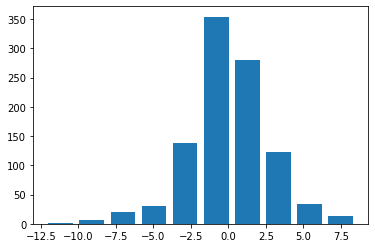

In [40]:
plt.hist(data_df['avg_days_bw_rchg_and_expiry'],  histtype='bar', rwidth = 0.8)

(array([  3.,   6.,  42., 127., 256., 314., 191.,  50.,  10.,   1.]),
 array([-31.23791168, -25.1590521 , -19.08019252, -13.00133294,
         -6.92247336,  -0.84361378,   5.2352458 ,  11.31410538,
         17.39296496,  23.47182454,  29.55068412]),
 <a list of 10 Patch objects>)

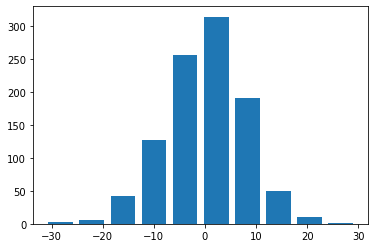

In [41]:
plt.hist(data_df['recharge_delay'],  histtype='bar', rwidth = 0.8)

In [42]:
data_df['recharge_delay'].skew(axis=0 , skipna= True )

-0.22901993506290635

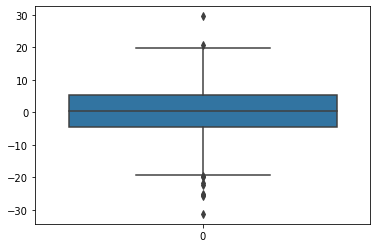

In [43]:
# figure1 = plt.figure(figsize =(25, 5))
b_p=sns.boxplot(data=data_df['recharge_delay'])

In [44]:
from scipy import stats
import numpy as np
 
z_score = np.abs(stats.zscore(data_df['recharge_delay']))

a_z_score = np.where(z_score>2)
print(a_z_score)
data_new = data_df.drop(a_z_score[0] , inplace =False)

(array([ 15,  39,  69,  73,  99, 118, 143, 177, 216, 225, 244, 255, 260,
       315, 329, 340, 355, 365, 366, 372, 394, 401, 403, 416, 418, 423,
       453, 507, 514, 702, 710, 711, 717, 749, 765, 770, 806, 820, 864,
       938, 959, 968, 974, 988, 992]),)


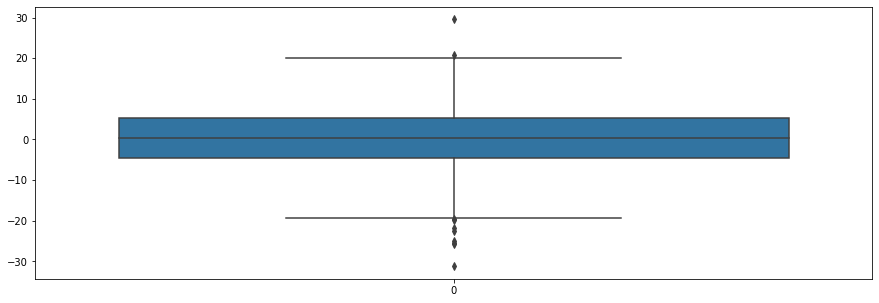

In [45]:
figure1 = plt.figure(figsize =(15, 5))
b_p=sns.boxplot(data=data_df['recharge_delay'])

In [46]:
#method 2 for outlier 

Q1 = np.percentile(data_df['recharge_delay'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data_df['recharge_delay'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", data_df.shape)
 
# Upper bound
upper = np.where(data_df['recharge_delay'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data_df['recharge_delay'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
data_df.drop(upper[0], inplace = True)
data_df.drop(lower[0], inplace = True)
 
print("New Shape: ", data_df.shape)

Old Shape:  (1000, 51)
New Shape:  (990, 51)


In [47]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

x=data_df
x = sm.add_constant(x)
y = data_df['recharge_delay']
train_x_raw, test_x_raw , train_y_raw, test_y_raw = train_test_split(x ,y ,train_size=0.8,random_state=123)

lmod_rawdata = sm.OLS(train_y_raw, train_x_raw).fit()
lmod_rawdata.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         recharge_delay   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.030e+27
Date:                Thu, 01 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:13:52   Log-Likelihood:                 21037.
No. Observations:                 792   AIC:                        -4.199e+04
Df Residuals:                     751   BIC:                        -4.180e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                             -2.842e-14   1.64e-12     -0.017      0.986   -3.25e-12     3.2e-12
customer_id                       -5.757e-17    9.1e-17     -0.633      0.527   -2.36e-16    1.21e-16
activation_plan_code              -3.539e-16   9.72e-15     -0.036      0.971   -1.94e-14    1.87e-14
mnp_flag                          -5.718e-15   8.27e-14     -0.069      0.945   -1.68e-13    1.57e-13
calls_incoming_cnt                 4.342e-14   1.74e-15     25.016      0.000       4e-14    4.68e-14
calls_outgoing_cnt                 4.272e-14   1.78e-15     23.985      0.000    3.92e-14    4.62e-14
calls_incoming_duration           -2.666e-15   8.47e-16     -3.146      0.002   -4.33e-15      -1e-15
calls_outgoing_duration           -3.095e-15   7.95e-16     -3.891      0.000   -4.66e-15   -1.53e-15
total_call_count                  -4.316e-14   2.52e-15    -17.144      0.000   -4.81e-14   -3.82e-14
total_sum_duration                 3.083e-15   5.28e-16      5.843      0.000    2.05e-15    4.12e-15
tot_usage_mb                      -1.693e-13   7.02e-18  -2.41e+04      0.000   -1.69e-13   -1.69e-13
upload_usage_mb                    1.692e-13   1.16e-17   1.46e+04      0.000    1.69e-13    1.69e-13
download_usage_mb                  1.693e-13   6.16e-18   2.75e+04      0.000    1.69e-13    1.69e-13
days_since_latch                   8.812e-16   7.18e-14      0.012      0.990    -1.4e-13    1.42e-13
cnt_open_qrc                       6.314e-16   1.25e-14      0.050      0.960    -2.4e-14    2.52e-14
avg_days_to_close                  3.955e-16   8.36e-15      0.047      0.962    -1.6e-14    1.68e-14
cnt_call_drops                    -5.551e-16    2.1e-14     -0.026      0.979   -4.17e-14    4.06e-14
pcnt_dropped_calls                 2.193e-15   5.06e-14      0.043      0.965   -9.72e-14    1.02e-13
rsrp_voice_pcnt_poor_duration      1.574e-15   6.48e-16      2.431      0.015    3.03e-16    2.85e-15
rsrp_data_pcnt_poor_duration      -1.103e-15   7.19e-16     -1.534      0.126   -2.52e-15    3.09e-16
mean_cqi_voice_pcnt_poor_duration  6.418e-17   1.55e-15      0.041      0.967   -2.98e-15    3.11e-15
sinr_voice_pcnt_poor_duration       6.64e-16   6.39e-16      1.039      0.299   -5.91e-16    1.92e-15
sinr_data_pcnt_poor_duration      -4.881e-16   6.49e-16     -0.752      0.452   -1.76e-15    7.86e-16
age_on_network                     3.678e-16   7.83e-15      0.047      0.963    -1.5e-14    1.57e-14
cnt_connections                    3.452e-16   2.07e-14      0.017      0.987   -4.03e-14     4.1e-14
current_plan_code                 -3.539e-16   8.93e-15     -0.040      0.968   -1.79e-14    1.72e-14
cnt_recharges_made                 -1.97e-15   1.55e-18  -1266.924      0.000   -1.97e-15   -1.97e-15
total_payment_made     

In [48]:
from scipy import stats
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
pred_Y_data_df = lmod_rawdata.predict(test_x_raw)
print(np.sqrt(mean_squared_error(test_y_raw,pred_Y_data_df)))
print(np.abs(r2_score(test_y_raw, pred_Y_data_df)))

6.78478017239071e-13
1.0


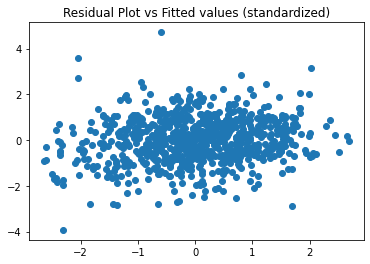

In [49]:
def get_standardized_values_data ( vals ) :
    return (vals - vals.mean())/vals.std()

standardized_predicted_values_data=get_standardized_values_data(lmod_rawdata.fittedvalues)
standardized_residuals_data=get_standardized_values_data(lmod_rawdata.resid)

# creating regression plots
plt.scatter(standardized_predicted_values_data,standardized_residuals_data)
plt.title("Residual Plot vs Fitted values (standardized)")
plt.show()

Residual Vs Fitted Plot

A "residuals versus fits plot" is the most frequently created plot. The plot is used to detect non-linearity, unequal error variances, and outliers.

- The residuals "bounce randomly" around the 0 line. This suggests that the assumption that the relationship is linear is reasonable.

- The residuals roughly form a "horizontal band" around the 0 line. This suggests that the variances of the error terms are equal.

- No one residual "stands out" from the basic random pattern of residuals. This suggests that there are no outliers


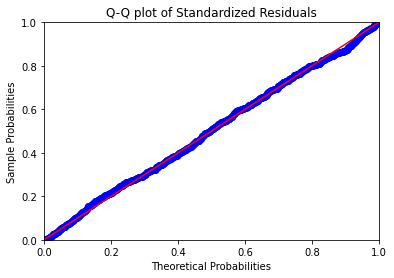

In [50]:
qqplot=sm.ProbPlot(standardized_residuals_data)
qqplot.ppplot(line="45")
plt.title("Q-Q plot of Standardized Residuals")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


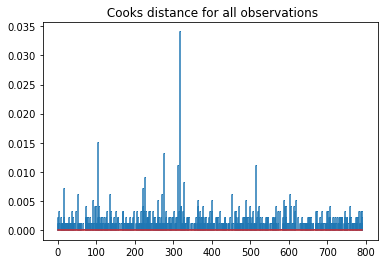

In [51]:
customer_data = lmod_rawdata.get_influence()  
(c, p) = customer_data.cooks_distance  

plt.stem(np.arange( len( train_x_raw)),  np.round( c, 3),  markerfmt=",");  
plt.title( " Cooks distance for all observations"); 

3 b: After you deliver your report, Ghansoli Raja wonders about the most importantpredictors of the recharge behaviour relationship depicted in question 3a. Only some ofthe features of the
original
dataset should be really meaningful. Then, he suggests to
completely redo your analysis
to see if you can find a (possibly, different) subset ofimportant (significant) predictors.

In [52]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

x = data_df[['stddev_days_bw_rchg_and_expiry','customer_id','ownership_individual','mnp_flag','pcnt_quota_used','calls_outgoing_cnt','tot_usage_mb','days_since_latch','avg_days_to_close','pcnt_dropped_calls','sinr_voice_pcnt_poor_duration','age_on_network','current_active_plan_validity','last_cycle_plan_mrp']]
x = sm.add_constant(x)
y = data_df['recharge_delay']
train_x, test_x , train_y, test_y = train_test_split(x ,y ,train_size=0.8,random_state=123)

lmod = sm.OLS(train_y, train_x).fit()
lmod.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         recharge_delay   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     89.97
Date:                Thu, 01 Sep 2022   Prob (F-statistic):          7.53e-152
Time:                        12:13:54   Log-Likelihood:                -2319.7
No. Observations:                 792   AIC:                             4669.
Df Residuals:                     777   BIC:                             4740.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -9.6525      6.054     -1.594      0.111     -21.536       2.231
stddev_days_bw_rchg_and_expiry     0.1220      0.053      2.323      0.020       0.019       0.225
customer_id                        0.0004      0.001      0.646      0.518      -0.001       0.001
ownership_individual               0.1991      0.359      0.555      0.579      -0.505       0.903
mnp_flag                          -0.6074      0.514     -1.182      0.238      -1.616       0.401
pcnt_quota_used                   -0.0576      0.008     -6.908      0.000      -0.074      -0.041
calls_outgoing_cnt                -0.0024      0.004     -0.562      0.574      -0.011       0.006
tot_usage_mb                      -0.0003   2.35e-05    -12.842      0.000      -0.000      -0.000
days_since_latch                  -0.0570      0.061     -0.931      0.352      -0.177       0.063
avg_days_to_close                 -0.0209      0.051     -0.407      0.684      -0.122       0.080
pcnt_dropped_calls                 2.3847      0.105     22.659      0.000       2.178       2.591
sinr_voice_pcnt_poor_duration      0.0643      0.006     11.129      0.000       0.053       0.076
age_on_network                    -0.0017      0.002     -1.051      0.294      -0.005       0.001
current_active_plan_validity       0.0004      0.001      0.450      0.653      -0.001       0.002
last_cycle_plan_mrp             5.554e-05      0.000      0.137      0.891      -0.001       0.001
==============================================================================
Omnibus:                        0.914   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.633   Jarque-Bera (JB):                0.978
Skew:                          -0.032   Prob(JB):                        0.613
Kurtosis:                       2.840   Cond. No.                     6.35e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
pred_Y = lmod.predict(test_x)

from sklearn.metrics import r2_score, mean_squared_error 

print(np.abs(r2_score(test_y, pred_Y)) )

0.6118133109550746


In [54]:
np.sqrt(mean_squared_error(test_y,pred_Y))

4.5426506015171535

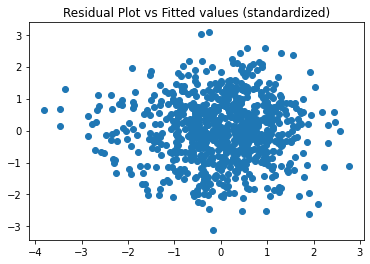

In [55]:
def get_standardized_values ( vals ) :
    return (vals - vals.mean())/vals.std()

standardized_predicted_values=get_standardized_values(lmod.fittedvalues)
standardized_residuals=get_standardized_values(lmod.resid)

# creating regression plots
plt.scatter(standardized_predicted_values,standardized_residuals)
plt.title("Residual Plot vs Fitted values (standardized)")
plt.show()

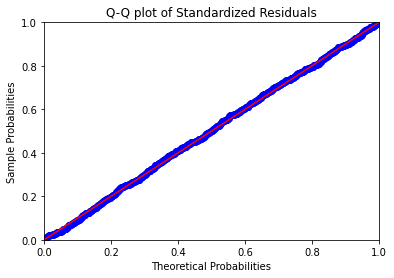

In [56]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

qqplot=sm.ProbPlot(standardized_residuals)
qqplot.ppplot(line="45")
plt.title("Q-Q plot of Standardized Residuals")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


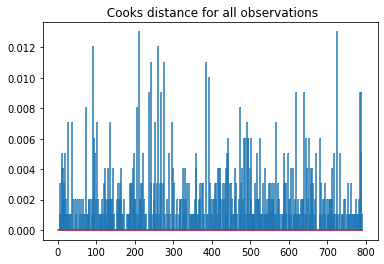

In [57]:
customer_data = lmod.get_influence()  
(c, p) = customer_data.cooks_distance  

plt.stem(np.arange( len( train_x)),  np.round( c, 3),  markerfmt=",");  
plt.title( " Cooks distance for all observations"); 

4 a: Vashi Kumari has a very busy schedule. She just read the report on the churn rate thatyou have written in Question 1. She is very happy that you have found a way to identifychurned customers, and she suggests you should get a promotion. However, beforedoing that, she wants to see if you can also build a model to identify the customers whoare going to churn based on historical data and your expertise. You go back to yourdesk, excited about the incoming promotion, and write a report to answer her curiosity.

In [93]:
df_data1.loc[df_data1['perecentile_recharge_delay'] >=90.0, 'churner_or_not'] = 1
df_data1.loc[df_data1['perecentile_recharge_delay'] < 90.0, 'churner_or_not'] = 0
df_data1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,perecentile_recharge_delay,avg_days_bw_rchg_and_expiry,churner_or_not
608,100.0,8.499451,1.0
412,99.9,8.176130,1.0
171,99.8,7.927657,1.0
889,99.7,7.709917,1.0
852,99.6,7.589958,1.0
...,...,...,...
189,90.5,3.191037,1.0
66,90.4,3.167711,1.0
537,90.3,3.164718,1.0
978,90.2,3.151526,1.0


In [98]:
X= df_data1
X = sm.add_constant(X)
Y = df_data1['churner_or_not']
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, train_size = 0.75)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [105]:
X= df_data1
X = sm.add_constant(X)
Y = df_data1['churner_or_not']
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, train_size = 0.75, random_state =1234)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [108]:
from sklearn.linear_model import LogisticRegression
## Initializing the model
logit_model = LogisticRegression(solver='lbfgs', random_state=0, penalty="none", max_iter=2000)
logit_model.fit(train_X, train_Y)

ValueError: ignored

In [109]:
logit_model.intercept_

AttributeError: ignored

In [110]:
logit_model.coef_

AttributeError: ignored

In [111]:
logit_model.predict(test_X)

AttributeError: ignored

In [112]:
cm = confusion_matrix(test_Y, logit_model.predict(test_X))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

AttributeError: ignored

In [113]:
print(classification_report(test_Y, logit_model.predict(test_X)))

AttributeError: ignored

In [114]:
precision = precision_score(test_Y, logit_model.predict(test_X))
recall = recall_score(test_Y, logit_model.predict(test_X))
 
print('Precision: ',precision)
print('Recall: ',recall)

AttributeError: ignored